# Recurrent Neural Network - LSTM


## SALVAR CONTEÚDO NO DRIVE PESSOAL!!!!! BAIXAR ESTA PASTA E FAZER UPLOAD PARA O SEU DRIVE

## Mount do drive pessoal

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
workdir_path = '/content/drive/My Drive/' + 'CURSOS - MATERIAL PRESENÇA E AVALIAÇÃO/BI MASTER/Disciplinas/RN/RN_Aula 07/StockMarket'  # Inserir o local da pasta onde estão os arquivos de entrada (treino e teste)
os.chdir(workdir_path)

In [3]:
#Verificar se a pasta mapeada contem os arquivos abaixo
!ls

Google_Stock_Price_Test.csv   RedesRecorrentesStockMarket.ipynb
Google_Stock_Price_Train.csv


## Parte 1 - Preprocessamento de Dados

### Importar as bibliotecas

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

### Importar a base de dados

In [0]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values #só coluna da série em si

### gráfico da série temporal

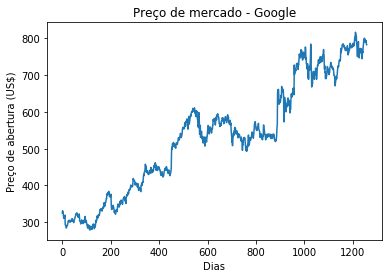

In [26]:
plt.plot(training_set)
plt.xlabel("Dias")
plt.ylabel("Preço de abertura (US$)")
plt.title("Preço de mercado - Google")
plt.show()

### Normalização

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

### Criar a estrutura de dados com janela 10 e output 1

In [0]:
window = 10
trainSize = len(training_set_scaled)
X_train = []
y_train = []
for i in range(window, trainSize):
    X_train.append(training_set_scaled[i-window:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

### Reshaping

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

## Parte 2 - Construção da RNN

### Bibliotecas necessárias

In [30]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


### Construção da Rede completa

In [31]:
# Initicializar a RNN
regressor = Sequential()
 
# Adicionar a primeira camada LSTM e Dropout 
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
 
# Adicionar a segunda camada LSTM e Dropout
regressor.add(LSTM(units = 80, return_sequences = True))
regressor.add(Dropout(0.2))
 
# Adicionar a terceira camada LSTM e Dropout
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
 
# camada de saída
regressor.add(Dense(units = 1))
 
# Compilar a rede
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Visualizar a rede
regressor.summary()

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 10, 100)           40800     
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 100)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 10, 80)            57920     
_________________________________________________________________
dropout_2 (Dropout)          (None, 10, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                26200     
_________________________________________________________________
dropout_3 (Dropout)  

### Treinamento

In [32]:
regressor.fit(X_train, y_train, epochs = 250, batch_size = 32)

Instructions for updating:
Use tf.cast instead.
Epoch 1/250
1248/1248 [==============================] - 4s 3ms/step - loss: 0.0484
Epoch 2/250
1248/1248 [==============================] - 1s 1ms/step - loss: 0.0066
Epoch 3/250
1248/1248 [==============================] - 1s 1ms/step - loss: 0.0045
Epoch 4/250
1248/1248 [==============================] - 1s 1ms/step - loss: 0.0042
Epoch 5/250
1248/1248 [==============================] - 1s 1ms/step - loss: 0.0037
Epoch 6/250
1248/1248 [==============================] - 1s 1ms/step - loss: 0.0036
Epoch 7/250
1248/1248 [==============================] - 1s 1ms/step - loss: 0.0038
Epoch 8/250
1248/1248 [==============================] - 1s 1ms/step - loss: 0.0029
Epoch 9/250
1248/1248 [==============================] - 1s 1ms/step - loss: 0.0034
Epoch 10/250
1248/1248 [==============================] - 1s 1ms/step - loss: 0.0033
Epoch 11/250
1248/1248 [==============================] - 1s 1ms/step - loss: 0.0030
Epoch 12/250
1248/1248 [==

## Parte 3 - Fazer as previsões e analisar os resultados

### Base de teste

In [0]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Construir a estrutura para teste

In [0]:
dataset_total = pd.concat((dataset_train.iloc[:,1], dataset_test.iloc[:,1]), axis = 0)
testLength = len(dataset_test)
inputs = dataset_total[len(dataset_total) - testLength - window:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(window, testLength + window): 
    X_test.append(inputs[i-window:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

### Fazer as previsões

In [0]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

### Visualizar os resultados de treino e teste

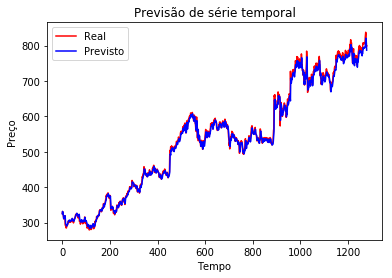

In [36]:
allTargetData = np.vstack((training_set, real_stock_price))
training_predicted_stock_price = regressor.predict(X_train)
training_predicted_stock_price = sc.inverse_transform(training_predicted_stock_price)
allForecastedData = np.vstack((training_set[0:window], training_predicted_stock_price, predicted_stock_price))
plt.plot(allTargetData, color = 'red', label = 'Real')
plt.plot(allForecastedData, color = 'blue', label = 'Previsto')
plt.title('Previsão de série temporal')
plt.xlabel('Tempo')
plt.ylabel('Preço')
plt.legend()
plt.savefig('predictions_training_test.svg')
plt.show()

## Parte 4 - Métricas de avaliação

In [37]:
import math
from sklearn.metrics import mean_squared_error
rmse = math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))
print('RMSE: ', rmse)

RMSE:  14.888693662271503


In [38]:
mse = mean_squared_error(real_stock_price, predicted_stock_price)
print('MSE: ',mse)

MSE:  221.67319896896365


In [39]:
mape = np.mean(np.abs((real_stock_price - predicted_stock_price) / real_stock_price)) * 100
print('MAPE: ',mape)

MAPE:  1.6858505343925227
